# TASK No. 03
## 1. Develop A Neural Network That Can Read Handwriting 
### Author Sakshi Gautam

## DataSet Information

## The MNIST dataset provided in a easy-to-use CSV format
The original dataset is in a format that is difficult for beginners to use. This dataset uses the work of Joseph Redmon to provide the MNIST dataset in a CSV format.

The dataset consists of two files:

1. mnist_train.csv
2. mnist_test.csv

The mnist_train.csv file contains the 60,000 training examples and labels. The mnist_test.csv contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).

## Import Modules

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading DataSet

In [6]:
mnist_train = pd.read_csv("mnist_train.csv")
mnist_test = pd.read_csv("mnist_test.csv")

In [7]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train = mnist_train["label"]
x_train = mnist_train.drop(labels = ["label"], axis = 1)
y_test = mnist_test["label"]
x_test = mnist_test.drop(labels = ["label"], axis = 1)

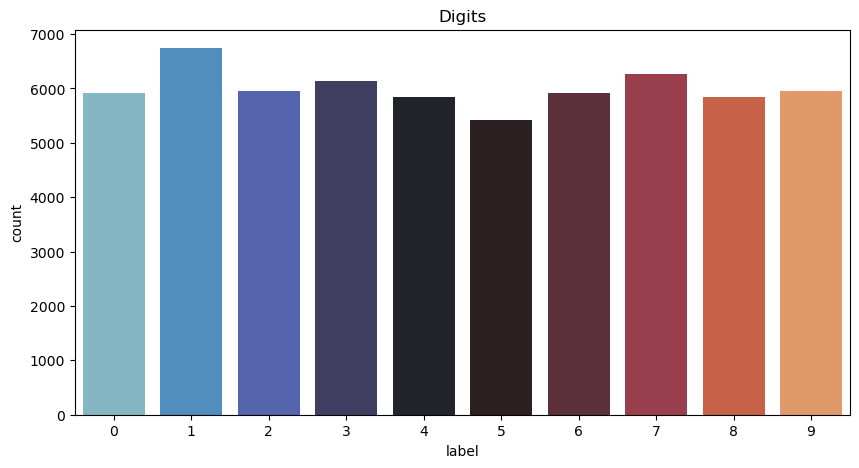

In [10]:
# Visualize the distribution of digits
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette="icefire")
plt.title("Digits")
plt.show()

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0
#changing colors to black and white

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test.shape

(10000, 28, 28, 1)

In [16]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)
print("x_train shape",x_train.shape)
print("x_val shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

x_train shape (54000, 28, 28, 1)
x_val shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_val shape (6000, 10)


In [18]:
x_train.shape[1:]

(28, 28, 1)

## Modeling

In [19]:
model = tf.keras.Sequential()
#first Conv
model.add(layers.Conv2D(32,(3,3),input_shape=x_train.shape[1:]))
model.add(layers.Activation("relu"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))

#second Conv
model.add(layers.Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(layers.Activation("relu"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))

#input layer
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.5))
#output layer
model.add(layers.Dense(len(mnist_train["label"].unique()))) #10
model.add(layers.Activation("softmax"))

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                        

In [21]:
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
)

In [22]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",
             metrics=["accuracy"])

In [23]:
datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.22,
    width_shift_range=0.02,
    height_shift_range=0.02,
    horizontal_flip=False,
    vertical_flip=False
)

In [24]:
epochs = 5
batch_size = 200

In [25]:
datagen_flow = datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size
)

In [26]:
history = model.fit(
    datagen_flow,
    epochs=epochs,
    validation_data=(x_val, y_val),
    steps_per_epoch=x_train.shape[0] // batch_size
)

Epoch 1/5
270/270 [==============================] - 97s 352ms/step - loss: 0.4689 - accuracy: 0.8507 - val_loss: 0.0843 - val_accuracy: 0.9750
Epoch 2/5
270/270 [==============================] - 94s 349ms/step - loss: 0.1601 - accuracy: 0.9504 - val_loss: 0.0512 - val_accuracy: 0.9850
Epoch 3/5
270/270 [==============================] - 96s 355ms/step - loss: 0.1153 - accuracy: 0.9641 - val_loss: 0.0399 - val_accuracy: 0.9878
Epoch 4/5
270/270 [==============================] - 95s 353ms/step - loss: 0.0991 - accuracy: 0.9703 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 5/5
270/270 [==============================] - 94s 346ms/step - loss: 0.0876 - accuracy: 0.9729 - val_loss: 0.0352 - val_accuracy: 0.9892


In [27]:
#saving results
model.save_weights("deneme.h5")
import json
with open("deneme.json","w") as f:
    json.dump(history.history,f)

## Checking the results

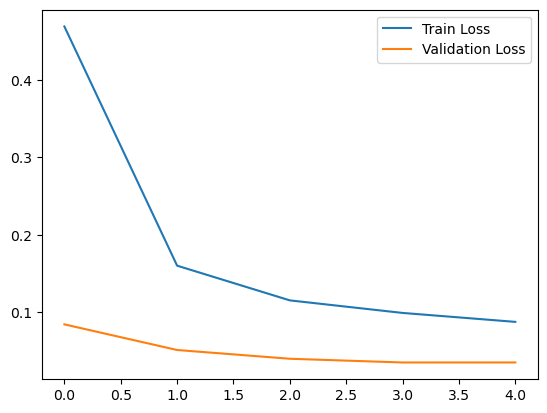

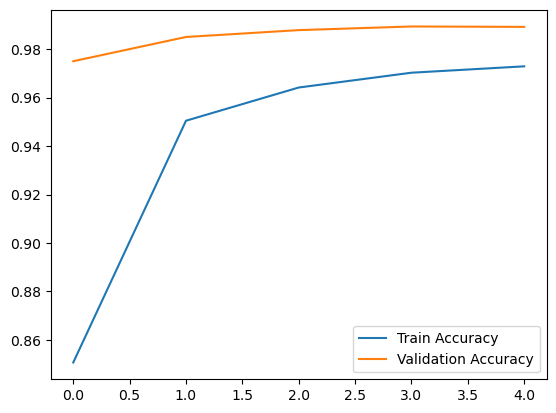

In [28]:
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.figure()
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()

## Check our model on test data

313/313 [==============================] - 5s 14ms/step


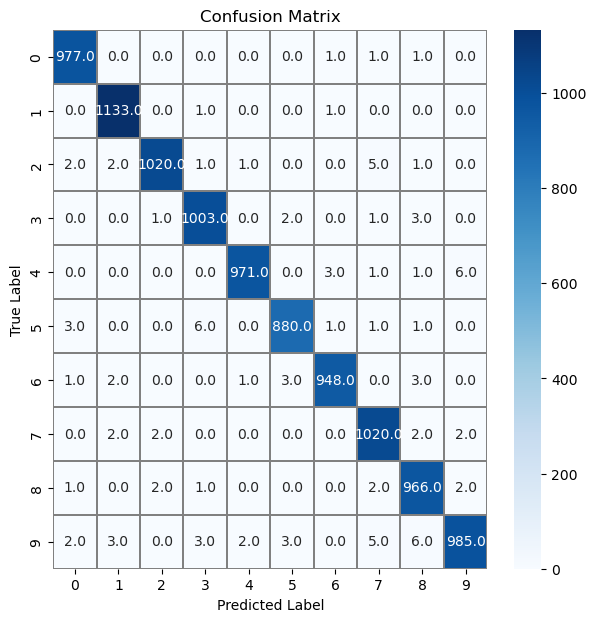

In [29]:
#Check which number we predicted wrong mostly via confusion matrix
# confusion matrix
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Check how many we pridicted wrong on test data

Found 8964 incorrect labels


C:\Users\HP\AppData\Local\Temp\ipykernel_13708\3602799006.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


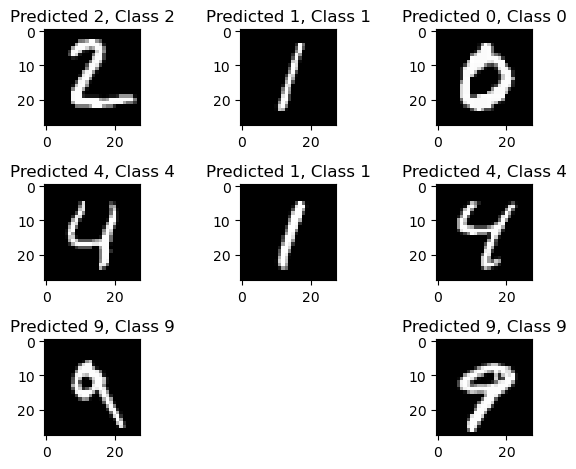

In [30]:
incorrect = np.where(Y_pred_classes!=Y_true)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(Y_pred_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()